# Holmusk Healthcare Dataset Challenge

## Problem Statement

- To analyze the clinical and financial data of patients hospitalized for a certain condition

## Packages

In [1]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import datetime
import pandas as pd
# MODELLING
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.pipeline import Pipeline
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

## Datasets

In [2]:
clinic = pd.read_csv('../data/clinical_data.csv')
demo = pd.read_csv('../data/demographics.csv')
txn = pd.read_csv('../data/bill_id.csv')
cost = pd.read_csv('../data/bill_amount.csv')

## Summaries of Datasets

### Functions to aid reporting

In [3]:
def varsummary(df):
    """
    Looks at the dataframe and looks at the data type of column, and then counts it.
    It also adds 
    
    Parameters
    ---------
    df: DataFrame
    
    Returns
    -------
    A count of numerical (int or float) and object type data columns in the dataframe
    """
    
    # creating numerical and object counter
    numtype = 0
    objtype = 0
    
    # iterate throught the dataframe columns
    for x in list(df.columns):
        
        # finds out if the column type if object
        if df[x].dtype == object: 
            
            # adds to object counter
            objtype += 1
        
        # finds out if the column type if numerical
        elif df[x].dtype == int or df[x].dtype == float:
            
            # adds to numerical counter
            numtype += 1
        
        # all others
        else: 
            pass
    
    
    print('Numerical type columns : ', numtype)
    print('Object type columns : ', objtype)
    print('Total columns : ', len(list(df.columns)))


In [4]:
def categoricalsummary(df):
    """
    Looks at the categorical variables in the dataframe and finds the count of unique categories in the variable
    
    Parameters
    ----------
    df: DataFrame
    
    Returns
    ------
    A summary of unique variables and their counts in the column
    """
    # iterate through the dataframe columns
    for x in list(df.columns):
        
        # finds out if the column type is object
        if df[x].dtype == object:
            
            # prints out the unique categories in the variables
            print(x)
            print(df[x].value_counts())
            print('\n')

In [5]:
def continuoussummary(df):
    """
    Looks at all continuous variables and reports the numerical range of the variable
    
    Parameters
    ---------
    df: DataFrame
    
    Returns
    -------
    A summary of all continuous variables and their numerical range
    """
    # iterates through the dataframe columns
    for x in list(df.columns):
        
        # finds out if the column type is numerical
        if df[x].dtype == int or df[x].dtype == float:
            
            # prints out the numerical range of variables
            print(x)
            print(df[x].agg(['min','mean','max']))
            print('\n')
    

### clinic 

In [6]:
# summary of overall types of data in the clinic
varsummary(clinic)

Numerical type columns :  22
Object type columns :  4
Total columns :  26


In [7]:
clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 26 columns):
id                    3400 non-null object
date_of_admission     3400 non-null object
date_of_discharge     3400 non-null object
medical_history_1     3400 non-null int64
medical_history_2     3167 non-null float64
medical_history_3     3400 non-null object
medical_history_4     3400 non-null int64
medical_history_5     3096 non-null float64
medical_history_6     3400 non-null int64
medical_history_7     3400 non-null int64
preop_medication_1    3400 non-null int64
preop_medication_2    3400 non-null int64
preop_medication_3    3400 non-null int64
preop_medication_4    3400 non-null int64
preop_medication_5    3400 non-null int64
preop_medication_6    3400 non-null int64
symptom_1             3400 non-null int64
symptom_2             3400 non-null int64
symptom_3             3400 non-null int64
symptom_4             3400 non-null int64
symptom_5             3400 non-null int64
lab

The clinic dataset (n= 3400) has 26 columns, of which there are 22 int or float columns, while the rest are object type. 

In [8]:
# summary of continuous variables in the clinic
continuoussummary(clinic)

medical_history_1
min     0.000000
mean    0.169118
max     1.000000
Name: medical_history_1, dtype: float64


medical_history_2
min     0.000000
mean    0.311336
max     1.000000
Name: medical_history_2, dtype: float64


medical_history_4
min     0.000000
mean    0.052059
max     1.000000
Name: medical_history_4, dtype: float64


medical_history_5
min     0.000000
mean    0.063953
max     1.000000
Name: medical_history_5, dtype: float64


medical_history_6
min     0.000000
mean    0.254706
max     1.000000
Name: medical_history_6, dtype: float64


medical_history_7
min     0.000000
mean    0.254412
max     1.000000
Name: medical_history_7, dtype: float64


preop_medication_1
min     0.000000
mean    0.503824
max     1.000000
Name: preop_medication_1, dtype: float64


preop_medication_2
min     0.000000
mean    0.591176
max     1.000000
Name: preop_medication_2, dtype: float64


preop_medication_3
min     0.000000
mean    0.820882
max     1.000000
Name: preop_medication_3, dtype: float

In [9]:
clinic.describe()

,medical_history_1,medical_history_2,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,preop_medication_3,preop_medication_4,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
count,3400.000000,3167.000000,3400.000000,3096.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,...,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,0.169118,0.311336,0.052059,0.063953,0.254706,0.254412,0.503824,0.591176,0.820882,0.523235,...,0.619706,0.662353,0.544706,0.726471,0.526765,14.469882,27.431529,99.489706,78.748441,165.084412
std,0.374911,0.463113,0.222178,0.244710,0.435760,0.435594,0.500059,0.491689,0.383507,0.499533,...,0.485530,0.472977,0.498071,0.445836,0.499357,1.747323,2.463844,15.254453,10.975076,6.973678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,9.100000,19.700000,52.000000,48.000000,151.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.200000,25.800000,88.000000,71.200000,160.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,14.500000,27.400000,100.000000,78.900000,165.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,15.800000,29.100000,110.000000,86.300000,170.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,20.300000,35.100000,150.000000,121.000000,186.000000


The dataframe show that the following variables - `medical_history_1`, `medical_history_2`, `medical_history_4`, `medical_history_5`, `medical_history_6`, `medical_history_7`, `preop_medication_1`, `preop_medication_2`, `preop_medication_3`, `preop_medication_4`, `preop_medication_5`, `preop_medication_6`, `symptom_1`, `symptom_2`, `symptom_3`, `symptom_4`, `symptom_5` - all show a high possibility of being a dummy coded variable as they only have 0 and 1 values.

In [10]:
categoricalsummary(clinic)

id
4e46fddfa404b306809c350aecbf0f6a    4
af713a949eda293f348bf51a058e48a1    3
8239986dfdf8f4e0bb351ace4742ef95    3
64a531972193ccf232cc47597ddb85ed    3
f01974d944d1c4b2c40753223fb979fa    3
                                   ..
3985cf3c9b80553e0bb1d71a3695e096    1
1152a2db862ff814518e16254bbe85c0    1
1cd81e8e42c4134ff903dc6d7c1c3e42    1
66c9296e52ce4a9657073e4ee2b0131a    1
b280aedb4d29baf12bccdd8cd156d5bb    1
Name: id, Length: 3000, dtype: int64


date_of_admission
2014-05-24    9
2012-06-26    7
2014-05-21    7
2015-08-21    7
2012-10-22    7
             ..
2014-03-15    1
2012-09-21    1
2015-08-27    1
2015-09-28    1
2012-10-08    1
Name: date_of_admission, Length: 1450, dtype: int64


date_of_discharge
2011-10-23    9
2011-10-09    7
2012-03-11    7
2011-08-05    7
2014-03-04    7
             ..
2011-03-30    1
2011-09-03    1
2011-12-04    1
2012-04-10    1
2011-05-05    1
Name: date_of_discharge, Length: 1532, dtype: int64


medical_history_3
0      2176
No      761
1 

The clinic dataset also shows that there is a number of repeated rows of duplicated patient ids. Further investigation is needed to ascertain if it is duplicated records. 

### Demographic

In [11]:
varsummary(demo)

Numerical type columns :  0
Object type columns :  5
Total columns :  5


The demographic dataset only consists of 5 object type columns. 

In [12]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
patient_id         3000 non-null object
gender             3000 non-null object
race               3000 non-null object
resident_status    3000 non-null object
date_of_birth      3000 non-null object
dtypes: object(5)
memory usage: 117.3+ KB


In [13]:
categoricalsummary(demo)

patient_id
9212740c35f262016e6872060b9e7d9d    1
5817499f483ba8944775e28630d1e2d9    1
35f84b54e067b0b29326e43d933b92cc    1
ce8a7b3f2e908df70eee331fa8a5d591    1
96eb77b383f05ea0ccf95aeb181518bb    1
                                   ..
e460a7acf88f8bc9710797ed7d47241e    1
da538cf31f069ce794ca52787c2db7a2    1
1995a7c4934f26d449fdd58b12b0a30c    1
3915494fa8c27e34ffea5f9ece8dad9a    1
a1bb69b4ec9b42d812bc4161805203b9    1
Name: patient_id, Length: 3000, dtype: int64


gender
Female    1396
Male      1333
m          170
f          101
Name: gender, dtype: int64


race
Chinese    1608
Malay       629
chinese     307
Indian      195
Others      161
India       100
Name: race, dtype: int64


resident_status
Singaporean          1782
Singapore citizen     610
PR                    465
Foreigner             143
Name: resident_status, dtype: int64


date_of_birth
1975-08-20    4
1975-08-23    3
1978-12-18    3
1970-05-19    3
1977-07-24    3
             ..
1938-01-04    1
1944-12-14    1


The dataset (n=3000) shows that there are no repeated `patient_id` records. However, `gender`, `race` and `resident_status` all contain different entries for the same categories. Further cleaning is needed for those columns. 

### Transactions

In [14]:
varsummary(txn)

Numerical type columns :  1
Object type columns :  2
Total columns :  3


In [15]:
txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 3 columns):
bill_id              13600 non-null int64
patient_id           13600 non-null object
date_of_admission    13600 non-null object
dtypes: int64(1), object(2)
memory usage: 318.9+ KB


The dataset (n = 13600) shows that there  are 2 object type columns and 1 numerical type column.

In [16]:
continuoussummary(txn)

bill_id
min     5.584120e+05
mean    5.007147e+09
max     9.999633e+09
Name: bill_id, dtype: float64




In [17]:
categoricalsummary(txn)

patient_id
4e46fddfa404b306809c350aecbf0f6a    16
e3270f450ee164e596ca933a25bab61d    12
d15ec3b278e42b36e7362ac783643685    12
8239986dfdf8f4e0bb351ace4742ef95    12
cebd42e84733dae9898687cfb750fbaf    12
                                    ..
0fec4d861ee094f3a0a27de2755d0ced     4
d3ceb2df50721c9db49d5d781bccc0fd     4
e24cd040a66d4b7bed7e0aabeed2d059     4
83689409b9aca7187463ae39d3f8f5a7     4
edb7df367fecf41af4fc406b79f23749     4
Name: patient_id, Length: 3000, dtype: int64


date_of_admission
2014-05-24    36
2012-10-14    28
2012-10-22    28
2015-08-21    28
2011-01-18    28
              ..
2012-09-21     4
2015-08-27     4
2015-09-28     4
2011-08-16     4
2012-09-09     4
Name: date_of_admission, Length: 1450, dtype: int64




The transaction dataset show that the `patient_id` column contains repeated ids, which might indicate that a patient might pay more than once during the treatment. In addition, the `bill_id` was mistakenly indicated as numerical type data instead of an object type data.

### Cost

In [18]:
varsummary(cost)

Numerical type columns :  2
Object type columns :  0
Total columns :  2


In [19]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 2 columns):
bill_id    13600 non-null int64
amount     13600 non-null float64
dtypes: float64(1), int64(1)
memory usage: 212.6 KB


In [20]:
continuoussummary(cost)

bill_id
min     5.584120e+05
mean    5.007147e+09
max     9.999633e+09
Name: bill_id, dtype: float64


amount
min        79.496707
mean     5464.767783
max     81849.751340
Name: amount, dtype: float64




The cost dataset (n=13600) contains two float type columns. However, the `bill_id` is shown to be incorrectly classified as a numerical type data, though there is no numerical relationship between the id and result. 

## Solving for errors

### Missing data

#### Finding missing data

In [21]:
#finding for missing data
for x in list(clinic.columns):
    print(x)
    print(clinic[x].isnull().value_counts())
    print(clinic[clinic[x] == '']['id'].count())
    print('\n')

id
False    3400
Name: id, dtype: int64
0


date_of_admission
False    3400
Name: date_of_admission, dtype: int64
0


date_of_discharge
False    3400
Name: date_of_discharge, dtype: int64
0


medical_history_1
False    3400
Name: medical_history_1, dtype: int64
0


medical_history_2
False    3167
True      233
Name: medical_history_2, dtype: int64
0


medical_history_3
False    3400
Name: medical_history_3, dtype: int64
0


medical_history_4
False    3400
Name: medical_history_4, dtype: int64
0


medical_history_5
False    3096
True      304
Name: medical_history_5, dtype: int64
0


medical_history_6
False    3400
Name: medical_history_6, dtype: int64
0


medical_history_7
False    3400
Name: medical_history_7, dtype: int64
0


preop_medication_1
False    3400
Name: preop_medication_1, dtype: int64
0


preop_medication_2
False    3400
Name: preop_medication_2, dtype: int64
0


preop_medication_3
False    3400
Name: preop_medication_3, dtype: int64
0


preop_medication_4
False    3400
N

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


The clinic dataframe shows that there are 233 missing values in `medical_history_2` and 304 in `medical_history_5`.

In [22]:
for x in list(txn.columns):
    print(x)
    print(txn[x].isnull().value_counts())
    print(txn[txn[x] == '']['bill_id'].count())
    print('\n')

bill_id
False    13600
Name: bill_id, dtype: int64
0


patient_id
False    13600
Name: patient_id, dtype: int64
0


date_of_admission
False    13600
Name: date_of_admission, dtype: int64
0




The txn dataset shows that there are no missing values.

In [23]:
for x in list(demo.columns):
    print(x)
    print(demo[x].isnull().value_counts())
    print(demo[demo[x] == '']['patient_id'].count())
    print('\n')

patient_id
False    3000
Name: patient_id, dtype: int64
0


gender
False    3000
Name: gender, dtype: int64
0


race
False    3000
Name: race, dtype: int64
0


resident_status
False    3000
Name: resident_status, dtype: int64
0


date_of_birth
False    3000
Name: date_of_birth, dtype: int64
0




The demographic dataset shows that there are no missing values. 

In [24]:
for x in list(cost.columns):
    print(x)
    print(cost[x].isnull().value_counts())
    print(cost[cost[x] == '']['bill_id'].count())
    print('\n')

bill_id
False    13600
Name: bill_id, dtype: int64
0


amount
False    13600
Name: amount, dtype: int64
0




The cost dataset shows that there are no missing values.

#### Dealing with missing data

In [25]:
clinic[clinic.isnull().any(axis = 1)]

,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height
5,59e07adc2dbc5f70131f57d003610d74,2011-01-07,2011-01-17,0,NaN,No,0,NaN,0,0,...,1,0,1,1,1,15.8,31.0,75.0,78.8,169.0
10,d45fcf3bec63ae3b436be42fad33b9e0,2011-01-12,2011-01-18,1,NaN,No,1,0.0,0,0,...,1,1,0,1,0,17.0,27.7,116.0,91.6,169.0
14,c59af905597b9be72420bbdbdad2ce42,2011-01-10,2011-01-22,0,NaN,0,0,NaN,0,0,...,1,1,1,1,0,15.6,30.9,87.0,71.1,177.0
20,7ce28b0d1309e0a2a74e38747ebd3f6c,2011-01-11,2011-01-25,0,NaN,No,0,0.0,1,0,...,0,0,0,0,1,14.0,31.3,123.0,88.0,151.0
22,c9809bb40710a9079848f06d47ef980b,2011-01-14,2011-01-25,0,NaN,1,0,0.0,0,0,...,0,1,1,1,1,15.2,25.2,70.0,79.1,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,be9f6767432045cd1a0d71b6afbd015a,2015-12-16,2015-12-28,0,0.0,1,0,NaN,0,0,...,0,1,0,1,0,14.7,27.1,94.0,70.4,151.0
3386,228e27d883c5bd9af820add27c253d53,2015-12-24,2015-12-30,0,NaN,No,0,0.0,1,0,...,1,1,0,1,0,12.4,25.8,87.0,80.3,162.0
3388,336bfb12d416ddf4a2475bb00b318cf1,2015-12-19,2016-01-01,0,NaN,0,0,0.0,0,1,...,0,0,0,1,0,12.9,28.1,98.0,92.9,151.0
3398,5189c62dfb8e6075b5c7fd4766671bd4,2015-12-26,2016-01-09,0,1.0,0,0,NaN,0,0,...,0,1,0,1,0,16.9,25.6,92.0,87.3,156.0


Missing data will be dropped as any form of imputation might influence prediction models later. Though making an additional category is possible, but it might trend towards the missing value category. 

### Changing misentries

#### Clinic: medical_history_3

As `medical_history_3` showed additional categories that were not converted to binary categories, the variable was recoded.

In [26]:
clinic['medical_history_3'] = clinic.medical_history_3.map({'No': 0, '0': 0, '1': 1, 'Yes': 1})

In [27]:
clinic['medical_history_3'].value_counts()

0    2937
1     463
Name: medical_history_3, dtype: int64

#### Demographic: race

As `race` showed additional categories that were duplicated categories, the variable was recoded.

In [28]:
demo.race.value_counts()

Chinese    1608
Malay       629
chinese     307
Indian      195
Others      161
India       100
Name: race, dtype: int64

In [29]:
demo['race'] = demo['race'].map({
    'Chinese': 'Chinese',
    'Malay': 'Malay',
    'chinese': 'Chinese',
    'Indian': 'Indian',
    'Others': 'Others', 
    'India': 'Indian'
})

In [30]:
demo.race.value_counts()

Chinese    1915
Malay       629
Indian      295
Others      161
Name: race, dtype: int64

#### Demographic: gender

Similarly, the `gender` column shows duplicated categories and thus was recoded.

In [32]:
demo['gender'].value_counts()

Female    1396
Male      1333
m          170
f          101
Name: gender, dtype: int64

In [33]:
demo['gender'] = demo['gender'].map({
    'Female': 'Female',
    'Male': 'Male',
    'm': 'Male',
    'f': 'Female'
})

In [34]:
demo['gender'].value_counts()

Male      1503
Female    1497
Name: gender, dtype: int64

#### Demographic: resident status

The `resident_status` shows duplicated category for 'singaporean' and thus recoded.

In [35]:
demo['resident_status'].value_counts()

Singaporean          1782
Singapore citizen     610
PR                    465
Foreigner             143
Name: resident_status, dtype: int64

In [36]:
demo['resident_status'] = demo['resident_status'].map({
    'Singaporean': 'Singaporean',
    'Singapore citizen': 'Singaporean',
    'PR': 'PR',
    'Foreigner': 'Foreigner'
})

In [37]:
demo['resident_status'].value_counts()

Singaporean    2392
PR              465
Foreigner       143
Name: resident_status, dtype: int64

### Changing data type of dates

Date columns datatype was changed to datetime type.

In [38]:
clinic['date_of_admission'] = pd.to_datetime(clinic['date_of_admission'], format = '%Y-%m-%d')

In [39]:
clinic['date_of_discharge'] = pd.to_datetime(clinic['date_of_discharge'], format = '%Y-%m-%d')

In [40]:
txn['date_of_admission'] = pd.to_datetime(txn['date_of_admission'], format = '%Y-%m-%d')

In [41]:
demo['date_of_birth'] = pd.to_datetime(demo['date_of_birth'], format = '%Y-%m-%d')

## Joining datasets

### Billing join

Transaction dataset was joined to cost dataset to make a billing dataset which contain the cost of each transaction. 

In [42]:
txn.sort_values(by = 'bill_id')

,bill_id,patient_id,date_of_admission
5851,558412,54c00a685cd49f4ed59a389657af655b,2013-02-23
7862,1219378,a135b44a73f9e99424a91edc846185de,2013-11-28
10700,3568195,4a8da205ade786dd74c316c39dcbe99f,2014-12-12
3106,3722123,277ad90d43a1289b0bf22f9795c5c706,2012-02-16
5206,4477075,a54070aa18ab3579495a157364f70a39,2012-12-03
...,...,...,...
7969,9994260912,215d86748264161be1c3bac0c82c15ef,2013-12-13
5172,9994410882,d26ce03a1420aa91d6e93a4256cad97c,2012-11-28
10958,9996337893,b7e7395d2621e75bef6b1a0c92cd99cd,2015-01-17
12036,9999037175,97f1811ff07527b24f25e3a6cd82cde9,2015-06-10


In [43]:
cost.sort_values(by = 'bill_id')

,bill_id,amount
6040,558412,6539.159300
6098,1219378,876.424366
3327,3568195,956.968933
12701,3722123,836.612493
6658,4477075,397.293041
...,...,...
854,9994260912,20457.184207
5710,9994410882,13178.470605
6653,9996337893,1871.369726
6208,9999037175,3649.064368


In [44]:
billing = pd.merge(txn, cost, on='bill_id')
billing.sort_values(by = 'bill_id')

,bill_id,patient_id,date_of_admission,amount
5851,558412,54c00a685cd49f4ed59a389657af655b,2013-02-23,6539.159300
7862,1219378,a135b44a73f9e99424a91edc846185de,2013-11-28,876.424366
10700,3568195,4a8da205ade786dd74c316c39dcbe99f,2014-12-12,956.968933
3106,3722123,277ad90d43a1289b0bf22f9795c5c706,2012-02-16,836.612493
5206,4477075,a54070aa18ab3579495a157364f70a39,2012-12-03,397.293041
...,...,...,...,...
7969,9994260912,215d86748264161be1c3bac0c82c15ef,2013-12-13,20457.184207
5172,9994410882,d26ce03a1420aa91d6e93a4256cad97c,2012-11-28,13178.470605
10958,9996337893,b7e7395d2621e75bef6b1a0c92cd99cd,2015-01-17,1871.369726
12036,9999037175,97f1811ff07527b24f25e3a6cd82cde9,2015-06-10,3649.064368


In [45]:
billing.patient_id.value_counts()

4e46fddfa404b306809c350aecbf0f6a    16
e3270f450ee164e596ca933a25bab61d    12
d15ec3b278e42b36e7362ac783643685    12
8239986dfdf8f4e0bb351ace4742ef95    12
cebd42e84733dae9898687cfb750fbaf    12
                                    ..
0fec4d861ee094f3a0a27de2755d0ced     4
d3ceb2df50721c9db49d5d781bccc0fd     4
e24cd040a66d4b7bed7e0aabeed2d059     4
83689409b9aca7187463ae39d3f8f5a7     4
edb7df367fecf41af4fc406b79f23749     4
Name: patient_id, Length: 3000, dtype: int64

In [46]:
billing.sort_values(by= 'patient_id')

,bill_id,patient_id,date_of_admission,amount
8870,8461069832,00225710a878eff524a1d13be817e8e2,2014-04-10,1074.885913
8871,7746811189,00225710a878eff524a1d13be817e8e2,2014-04-10,3710.864731
8877,4692776325,00225710a878eff524a1d13be817e8e2,2014-04-10,325.319345
8868,5175703971,00225710a878eff524a1d13be817e8e2,2014-04-10,79.496707
5024,3604841170,0029d90eb654699c18001c17efb0f129,2012-11-07,416.161130
...,...,...,...,...
5366,4479145827,ffd67c2bcfb32508d2cf7b1e1193e2ed,2012-12-24,22252.602435
6560,7388693307,ffd9644f8daf1d28493a7cd700bb30f4,2013-06-04,1475.253239
6559,6862282934,ffd9644f8daf1d28493a7cd700bb30f4,2013-06-04,940.451925
6563,7406466784,ffd9644f8daf1d28493a7cd700bb30f4,2013-06-04,18208.655474


The billing dataset show that there were multiple transactions on one patient on one visit. Thus, the transactions were summed together to a total sum. 

In [47]:
price = billing.groupby(['patient_id', 'date_of_admission']).sum()
price.drop('bill_id', axis = 1, inplace = True)
price.columns

Index(['amount'], dtype='object')

### Clinic: creating new features

A new feature was created to cover hospitalisation time.

In [48]:
clinic['hospital_stay'] = clinic['date_of_discharge'] - clinic['date_of_admission'] 

In [49]:
clinic['hospital_stay'] = [int(str(x).split(' ')[0]) for x in clinic['hospital_stay']]

In [54]:
clinic.columns = ['patient_id', 'date_of_admission', 'date_of_discharge', 'medical_history_1',
       'medical_history_2', 'medical_history_3', 'medical_history_4',
       'medical_history_5', 'medical_history_6', 'medical_history_7',
       'preop_medication_1', 'preop_medication_2', 'preop_medication_3',
       'preop_medication_4', 'preop_medication_5', 'preop_medication_6',
       'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height',
       'hospital_stay']

### New dataframe - Stay
A stay dataframe was created to store the dataset hospital stay.

In [55]:
stay = clinic[['patient_id', 'date_of_admission','hospital_stay']].groupby('patient_id').sum()
stay.index

Index(['00225710a878eff524a1d13be817e8e2', '0029d90eb654699c18001c17efb0f129',
       '0040333abd68527ecb53e1db9073f52e', '00473b58e3dc8ae37b3cb34069705083',
       '0078662d1d983dde68ea057c42d5b5cf', '0088bbd94c90bbc9158e13465441ebb6',
       '0092d20dd0719e88ecfdd02d5e7ca7b7', '01081b8bcb0f9e27b888d23bb35a50dd',
       '010cf28233f50d3857b499a9c208c610', '0116c5d9b6c2c2e8758c75e6da86014b',
       ...
       'ff4e12b747203554bdd62c6a36f0e112', 'ff6de9534e28ea31f928ac79c399ecd6',
       'ff727bbb751f38bceedaf6f6963ece23', 'ff78b422b8c6b83e40f11ca7d62da682',
       'ff7a523f1dbd0385e731b4185cf64683', 'ffa5a615a4cc5fb1ada0443edc1f5dd3',
       'ffac3c4b6838f42625e1dd00dd7c867b', 'ffc19537fa6621512ef4f296d60896ce',
       'ffd67c2bcfb32508d2cf7b1e1193e2ed', 'ffd9644f8daf1d28493a7cd700bb30f4'],
      dtype='object', name='patient_id', length=3000)

__Visual check of billing and clinic information__

In [56]:
billing[billing['patient_id']== '1d21f2be18683991eb93d182d6b2d220']

,bill_id,patient_id,date_of_admission,amount
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01,951.214467
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01,12338.269972
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01,1133.601902
5,1692196063,1d21f2be18683991eb93d182d6b2d220,2011-01-01,982.332324
12792,6466235037,1d21f2be18683991eb93d182d6b2d220,2015-09-17,1498.125668
12793,7809633370,1d21f2be18683991eb93d182d6b2d220,2015-09-17,16064.717244
12794,5607272671,1d21f2be18683991eb93d182d6b2d220,2015-09-17,1068.897462
12795,5776306727,1d21f2be18683991eb93d182d6b2d220,2015-09-17,1267.841329


In [57]:
clinic[clinic['patient_id']== '1d21f2be18683991eb93d182d6b2d220']

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,symptom_2,symptom_3,symptom_4,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,hospital_stay
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,0,0,1,1,13.2,30.9,123.0,71.3,161.0,10
3200,1d21f2be18683991eb93d182d6b2d220,2015-09-17,2015-09-30,0,0.0,0,0,0.0,0,1,...,1,0,1,1,16.4,23.7,108.0,72.3,161.0,13


### Renaming clinic patient id columns

In [58]:
clinic.columns = ['patient_id', 'date_of_admission', 'date_of_discharge', 'medical_history_1',
       'medical_history_2', 'medical_history_3', 'medical_history_4',
       'medical_history_5', 'medical_history_6', 'medical_history_7',
       'preop_medication_1', 'preop_medication_2', 'preop_medication_3',
       'preop_medication_4', 'preop_medication_5', 'preop_medication_6',
       'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height',
       'hospital_stay']

In [59]:
clinic.columns

Index(['patient_id', 'date_of_admission', 'date_of_discharge',
       'medical_history_1', 'medical_history_2', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'weight', 'height', 'hospital_stay'],
      dtype='object')

### Merging datasets

The clinic and price dataset were merged to form a complete dataset to form a dataset with medical data, personal biological data and price of stay.

In [60]:
complete = pd.merge(clinic, 
                    price,  
                    how='left', 
                    left_on=['patient_id','date_of_admission'], 
                    right_on = ['patient_id','date_of_admission'])

In [61]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
patient_id         3000 non-null object
gender             3000 non-null object
race               3000 non-null object
resident_status    3000 non-null object
date_of_birth      3000 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 117.3+ KB


In [62]:
completewdemo = pd.merge(complete,
                         demo,
                         how='left',
                         left_on=['patient_id'],
                         right_on = ['patient_id'])

In [63]:
completewdemo.shape

(3400, 32)

In [64]:
## complete with NaN values
complete_full = completewdemo.dropna()

A dataset was created where all records with NaN values were dropped.

### Creating addtional feature

A new column 'age' was created.

In [65]:
complete_full['age'] = complete_full['date_of_admission'] - complete_full['date_of_birth'] 

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
complete_full['age'] = [int(str(x).split(' ')[0])/365 for x in complete_full['age']]

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
complete_full

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,lab_result_3,weight,height,hospital_stay,amount,gender,race,resident_status,date_of_birth,age
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,123.0,71.3,161.0,10,15405.418665,Male,Indian,Singaporean,1976-12-19,34.057534
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,89.0,78.4,160.0,10,23303.000924,Female,Malay,Singaporean,1978-07-20,32.473973
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,100.0,72.0,151.0,11,16813.123088,Female,Indian,Singaporean,1967-08-14,43.416438
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,0,0,0.0,1,1,...,76.0,64.4,152.0,12,27994.878530,Female,Chinese,PR,1967-12-06,43.104110
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,0,0,0.0,1,1,...,87.0,55.6,160.0,8,10707.950907,Female,Others,PR,1982-07-18,28.495890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,f253e6e69fdc53f07ec682df8ed1a80e,2015-12-21,2016-01-05,0,0.0,0,0,0.0,0,0,...,114.0,91.7,166.0,15,22113.996629,Male,Chinese,Foreigner,1964-10-12,51.224658
3394,3f052a68d7c25d817a63aa1ba70f4dc2,2015-12-21,2016-01-06,0,0.0,0,0,0.0,0,0,...,106.0,84.8,162.0,16,25040.612435,Female,Chinese,Singaporean,1943-06-22,72.547945
3395,4368c266084e640c469a5d41b339805c,2015-12-26,2016-01-07,0,0.0,0,0,0.0,0,0,...,129.0,79.5,167.0,12,20730.378614,Female,Chinese,Singaporean,1964-01-05,52.008219
3396,4f67a54ab205cc9e7e2b0a4ee08e4fba,2015-12-28,2016-01-07,0,0.0,0,0,0.0,1,0,...,107.0,72.7,155.0,10,19356.767331,Female,Chinese,Singaporean,1970-08-07,45.421918


### Final Dataset: categorical and continuous variable list

In [68]:
cont = []
cat = []
for x in complete_full.columns:
    if 'medical_history' in x or 'preop_medication' in x or 'symptom' in x:
        cat.append(x)
    elif 'patient_id' in x: 
        pass
    elif complete_full[x].dtype == object or complete_full[x].dtype == 'O':
        cat.append(x)
    elif complete_full[x].dtype == int or complete_full[x].dtype == float:
        cont.append(x)
    else:
        pass

In [70]:
print(cont, '\n', cat)

['lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height', 'hospital_stay', 'amount', 'age'] 
 ['medical_history_1', 'medical_history_2', 'medical_history_3', 'medical_history_4', 'medical_history_5', 'medical_history_6', 'medical_history_7', 'preop_medication_1', 'preop_medication_2', 'preop_medication_3', 'preop_medication_4', 'preop_medication_5', 'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5', 'gender', 'race', 'resident_status']


## Data Visualisation

### Continuous variables

0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1


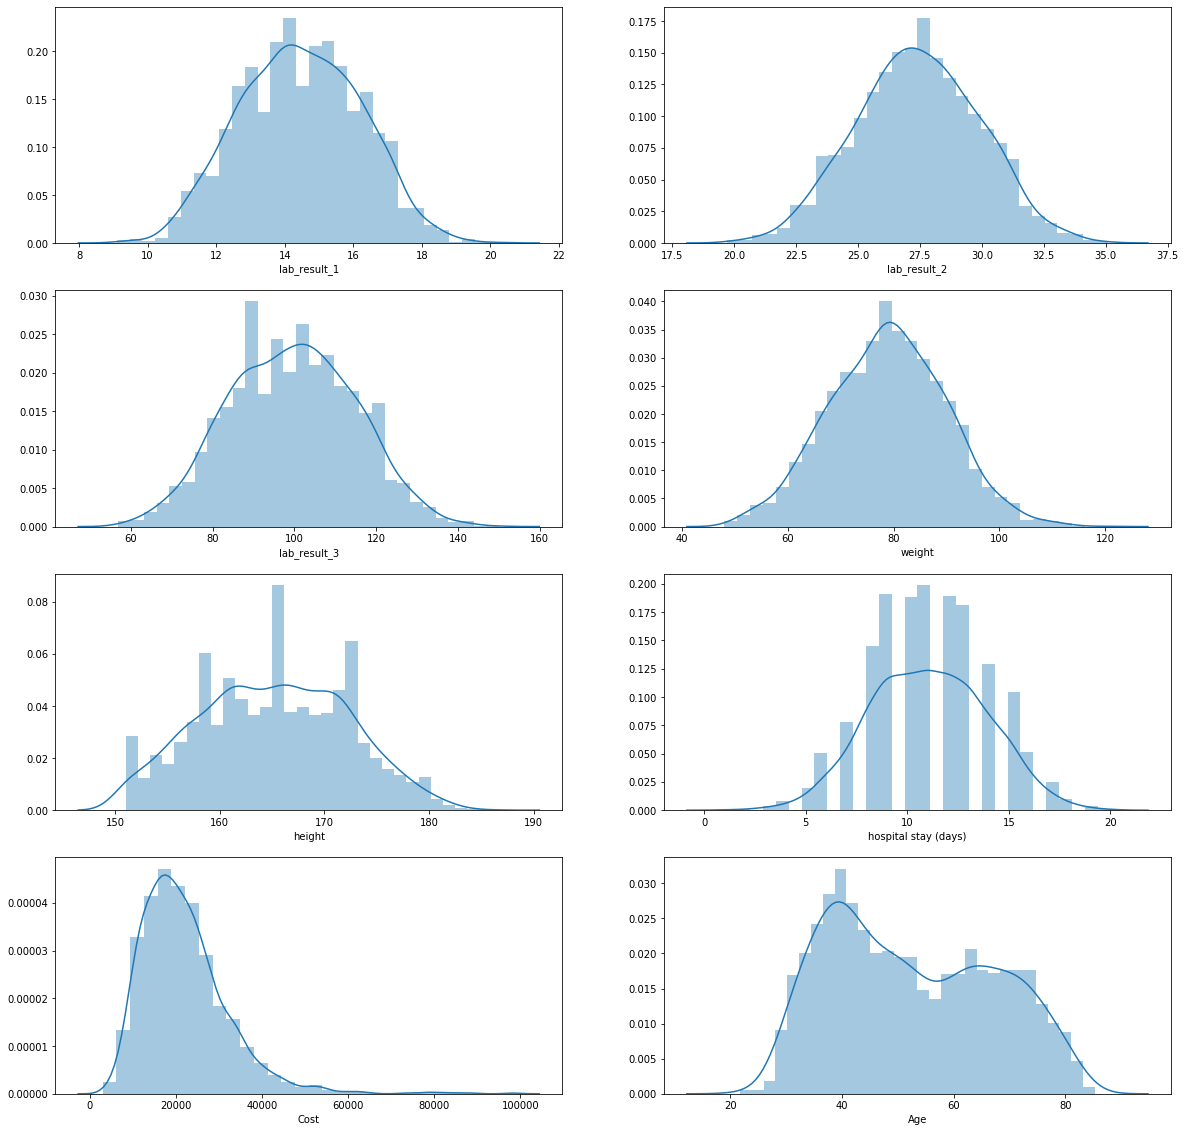

In [71]:
# visualising the distribution of the continuous var
nrows = int(math.ceil((len(cont))//2))
ncols = 2
fig, ax = plt.subplots((nrows), ncols, figsize = (20,20))
label = ['lab_result_1', 'lab_result_2', 'lab_result_3', 'weight', 'height', 'hospital stay (days)', 'Cost', 'Age'] 
for i in range(len(cont)):
    row = i//2
    col = i% 2
    print(row, col)
    plottable = cont[i]
    g = sns.distplot(complete_full[plottable],
                     bins = 30, 
                     norm_hist = True,  
                     ax = ax[row, col],
                     axlabel = label[i])

The continuous variables show close to a normal distribution for `lab_result_1`, `lab_result_2`, `lab_result_3`, `weight`, `height` and `hospital_stay`. `amount` on the other hand shows a positively skewed distribution curve and `age` showed a non-normal distribution 

### Categorical variables

In [72]:
cat_10 = ['medical_history_1',
          'medical_history_2',
          'medical_history_3',
          'medical_history_4',
          'medical_history_5',
          'medical_history_6',
          'medical_history_7',
          'preop_medication_1',
          'preop_medication_2',
          'preop_medication_3',
          'preop_medication_4',
          'preop_medication_5',
          'preop_medication_6',
          'symptom_1',
          'symptom_2',
          'symptom_3',
          'symptom_4',
          'symptom_5']

In [73]:
# changing types
for x in complete_full.columns:
    if x in cat_10:
        complete_full[x] = [str(int(y))for y in complete_full[x]]
    else:
        pass

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [74]:
complete_full

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,lab_result_3,weight,height,hospital_stay,amount,gender,race,resident_status,date_of_birth,age
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1,0,0,0,0,0,...,123.0,71.3,161.0,10,15405.418665,Male,Indian,Singaporean,1976-12-19,34.057534
1,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0,0,0,0,0,0,...,89.0,78.4,160.0,10,23303.000924,Female,Malay,Singaporean,1978-07-20,32.473973
2,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0,0,0,0,0,0,...,100.0,72.0,151.0,11,16813.123088,Female,Indian,Singaporean,1967-08-14,43.416438
3,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1,0,0,0,1,1,...,76.0,64.4,152.0,12,27994.878530,Female,Chinese,PR,1967-12-06,43.104110
4,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0,0,0,0,1,1,...,87.0,55.6,160.0,8,10707.950907,Female,Others,PR,1982-07-18,28.495890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,f253e6e69fdc53f07ec682df8ed1a80e,2015-12-21,2016-01-05,0,0,0,0,0,0,0,...,114.0,91.7,166.0,15,22113.996629,Male,Chinese,Foreigner,1964-10-12,51.224658
3394,3f052a68d7c25d817a63aa1ba70f4dc2,2015-12-21,2016-01-06,0,0,0,0,0,0,0,...,106.0,84.8,162.0,16,25040.612435,Female,Chinese,Singaporean,1943-06-22,72.547945
3395,4368c266084e640c469a5d41b339805c,2015-12-26,2016-01-07,0,0,0,0,0,0,0,...,129.0,79.5,167.0,12,20730.378614,Female,Chinese,Singaporean,1964-01-05,52.008219
3396,4f67a54ab205cc9e7e2b0a4ee08e4fba,2015-12-28,2016-01-07,0,0,0,0,0,1,0,...,107.0,72.7,155.0,10,19356.767331,Female,Chinese,Singaporean,1970-08-07,45.421918


0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1
5 0
5 1
6 0
6 1
7 0
7 1
8 0
8 1
9 0
9 1
10 0


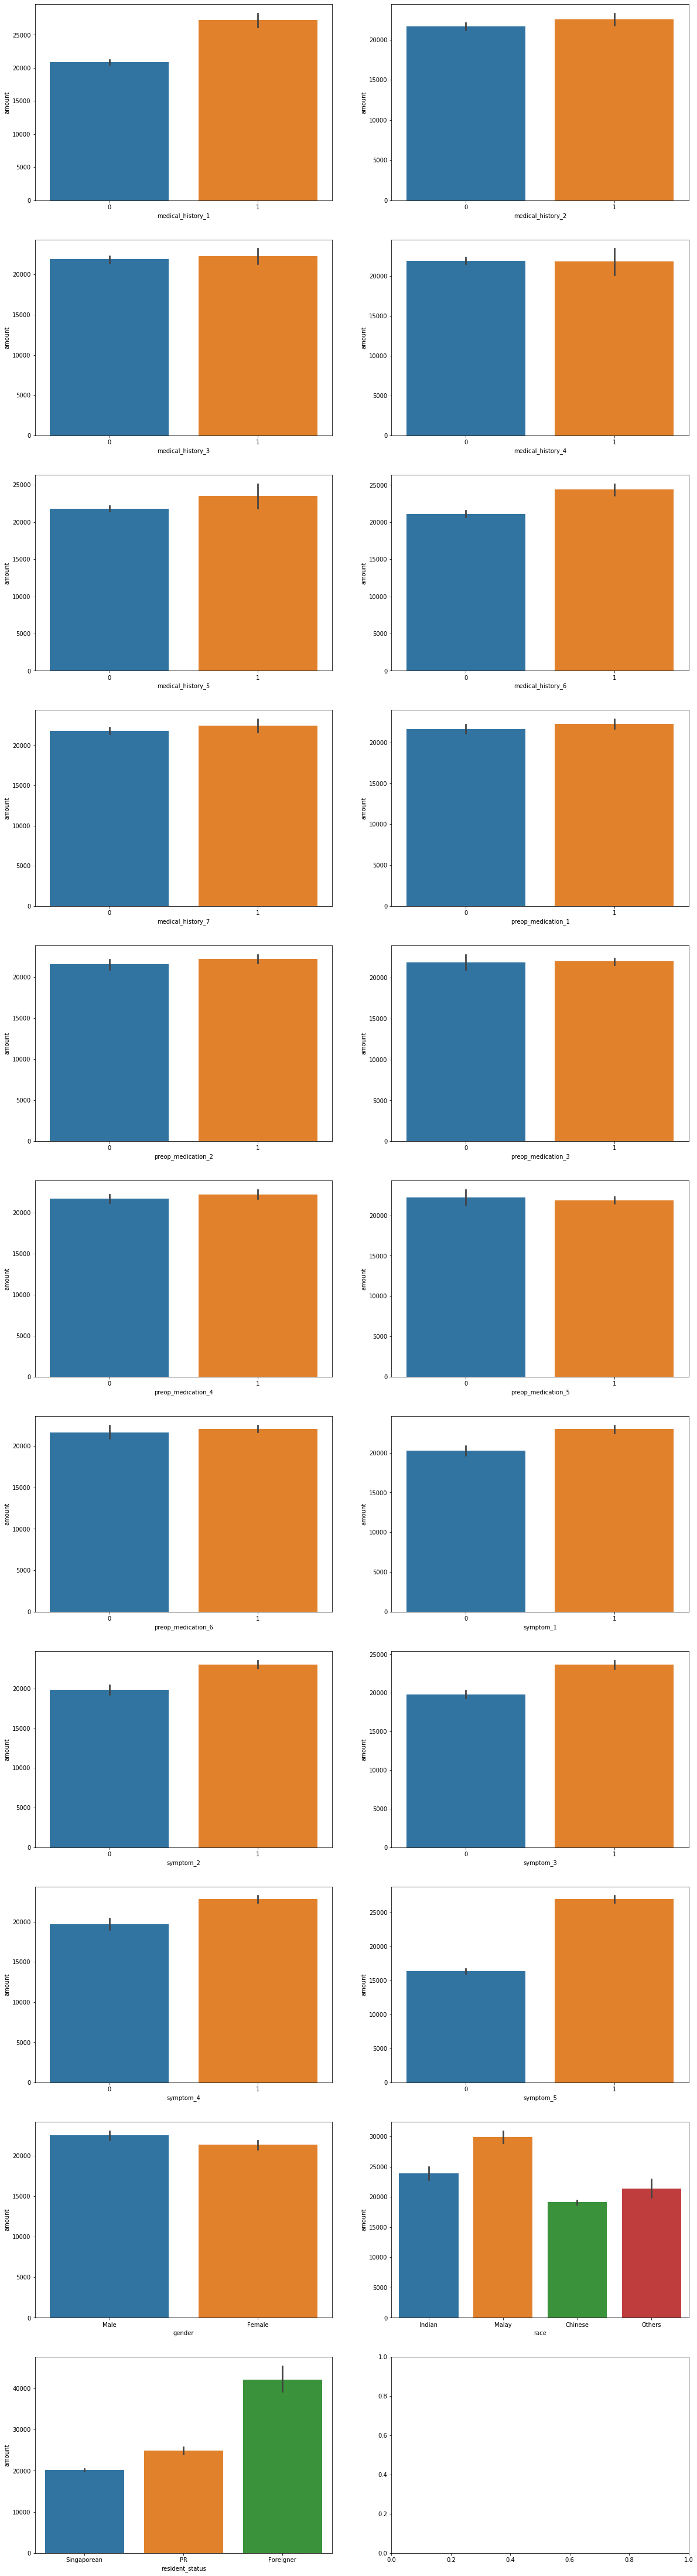

In [75]:
# visualising the categorical variables
nrows = int(math.ceil((len(cat))//2))
ncols = 2
fig, ax = plt.subplots((nrows+1), ncols, figsize = (20,80))
for i in range(len(cat)):
    row = i//2
    col = i% 2
    print(row, col)
    plottable = cat[i]
    sns.barplot(x = plottable,
                y = 'amount',
                ax = ax[row, col],
                data = complete_full)

The categorical variables show that there is difference of cost between having medical_history_1, 5 or 6, while having any of the symptoms tend to have a higher cost. Being female also led to lower medical costs, while Chinese patients tended to have lowest cost, while Malay patients tended to have highest cost visually. In addition, foreign patients tended to have highest cost, while Singaporean had lowest cost.

##  EDA
### Correlation test

(8, 0)

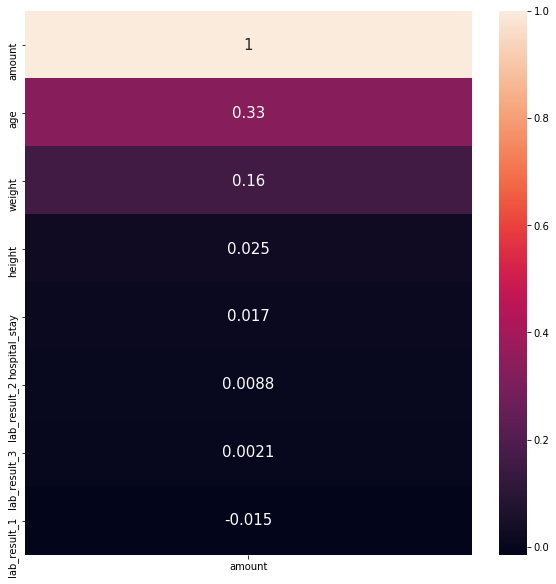

In [76]:
plt.figure(figsize = (10,10))
ax = sns.heatmap(complete_full[cont].corr()[['amount']].sort_values(by='amount', ascending= False), annot = True, annot_kws = {'size': 15})
ax.set_ylim(8,0)

Correlation test showed that the patient's weight, height, hospital stay and lab results have low correlation to the cost of stay in the hospital, while age was the highest correlation.

### t-tests for continuous variables

In [77]:
cat_result_dict = {}
significant = []
for x in cat_10:
    
    #Selecting categories
    cat1 = complete_full[complete_full[x]==(complete_full[x].unique()[0])]['amount']
    cat2 = complete_full[complete_full[x]==(complete_full[x].unique()[1])]['amount']
    
    #t-test
    t, p = stats.ttest_ind(cat1, cat2)
    
    #result logging
    cat_result_dict[x] = {complete_full[x].unique()[0]:cat1.mean(),
                          complete_full[x].unique()[1]:cat2.mean(),
                          'statistic': t, 'P': p}
    if p <=0.05:
        significant.append(x)

cat_result_dict

{'medical_history_1': {'0': 20855.27218451576,
  '1': 27214.710499195717,
  'statistic': -12.858022957114743,
  'P': 7.742321567167567e-37},
 'medical_history_2': {'1': 22520.49588729034,
  '0': 21678.646823465908,
  'statistic': 2.0458809884490563,
  'P': 0.04085822879999967},
 'medical_history_3': {'0': 21892.840863304657,
  '1': 22279.189635329076,
  'statistic': -0.6938292849473524,
  'P': 0.48784492216570197},
 'medical_history_4': {'0': 21951.04447584158,
  '1': 21856.69474251088,
  'statistic': 0.1117560118620149,
  'P': 0.9110246112354949},
 'medical_history_5': {'0': 21835.499601295465,
  '1': 23537.317625595417,
  'statistic': -2.1885728165731164,
  'P': 0.028707512021147893},
 'medical_history_6': {'0': 21100.934705740943,
  '1': 24396.642452558495,
  'statistic': -7.581584205917019,
  'P': 4.567760142248739e-14},
 'medical_history_7': {'0': 21789.289948930524,
  '1': 22405.943972194113,
  'statistic': -1.4008152585580729,
  'P': 0.16137646378934312},
 'preop_medication_1': 

### ANOVA test for categorical distribution

In [78]:
## defining a function to perform ANOVA through the list 
def ANOVA_list(searchlist, dataframe, resultdict):
    a = {}
    for var in searchlist:
        var_unique_list = []
        count = 0
        resultdict[var] = {}
        for i in range(len(dataframe[var].unique())):
            count += 1 
            if pd.isnull(dataframe[var].unique()[i]) == True:
                next
            else:
                var_unique_list.append(dataframe[var].unique()[i])
                dataframe[var].unique()[i] = dataframe[dataframe[var]==\
                        (dataframe[var].unique()[i])]['amount']
        for cat in var_unique_list:
            if pd.isnull(cat) == True:
                next
            else:
                resultdict[var][str(cat)] = \
                dataframe['amount'][dataframe[var]\
                                       == cat].mean()
        f, p = stats.f_oneway(*(dataframe['amount'][dataframe[var]\
                                    == cat] for cat in var_unique_list))
        resultdict[var]['statistic'] = f
        resultdict[var]['P'] = p 
        if p <= 0.05:
            significant.append(var)
    return resultdict

In [79]:
cat_more = ['race', 'resident_status']

In [80]:
ANOVA_list(cat_more, complete_full, cat_result_dict)

{'medical_history_1': {'0': 20855.27218451576,
  '1': 27214.710499195717,
  'statistic': -12.858022957114743,
  'P': 7.742321567167567e-37},
 'medical_history_2': {'1': 22520.49588729034,
  '0': 21678.646823465908,
  'statistic': 2.0458809884490563,
  'P': 0.04085822879999967},
 'medical_history_3': {'0': 21892.840863304657,
  '1': 22279.189635329076,
  'statistic': -0.6938292849473524,
  'P': 0.48784492216570197},
 'medical_history_4': {'0': 21951.04447584158,
  '1': 21856.69474251088,
  'statistic': 0.1117560118620149,
  'P': 0.9110246112354949},
 'medical_history_5': {'0': 21835.499601295465,
  '1': 23537.317625595417,
  'statistic': -2.1885728165731164,
  'P': 0.028707512021147893},
 'medical_history_6': {'0': 21100.934705740943,
  '1': 24396.642452558495,
  'statistic': -7.581584205917019,
  'P': 4.567760142248739e-14},
 'medical_history_7': {'0': 21789.289948930524,
  '1': 22405.943972194113,
  'statistic': -1.4008152585580729,
  'P': 0.16137646378934312},
 'preop_medication_1': 

`medical_history_1`, `medical_history_2`, `medical_history_5`, `medical_history_6`, `symptom_1`, `symptom_2`, `symptom_3`, `symptom_4`, `symptom_5`, `gender`, `race`, `resident_status` all showed significant difference in mean cost between categories. 

## Modelling
### Creating dummies

In [81]:
dummy = ['medical_history_1', 'medical_history_2', 'medical_history_5', 
         'medical_history_6', 'symptom_1', 'symptom_2', 'symptom_3', 
         'symptom_4', 'symptom_5', 'gender', 'race', 'resident_status']

In [82]:
#creating dummies for dataset
modeldf = pd.get_dummies(complete_full, drop_first= True, columns = dummy)

In [144]:
features = ['medical_history_1_1', 'medical_history_2_1', 'medical_history_5_1',
            'medical_history_6_1', 'symptom_1_1', 'symptom_2_1', 'symptom_3_1',
            'symptom_4_1', 'symptom_5_1', 'gender_Male', 'race_Indian',
            'race_Malay', 'race_Others', 'resident_status_PR',
            'resident_status_Singaporean', 'weight', 'age']

### splitting data into train and test

In [145]:
X_train, X_test, y_train, y_test = train_test_split(modeldf[features],\
                                                    modeldf['amount'],\
                                                    test_size = 0.25,\
                                                    random_state = 42)

In [146]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2173, 17) (725, 17) (2173,) (725,)


### Scaling the data

In [147]:
#scaling data
ss = StandardScaler()

In [148]:
#fitting and transforming the datasets
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Pipeline

In [149]:
def pipeline(items, X_train, X_val, y_train, y_val):
    """
    function to create a pipeline that determines which test and parameters
    have the highest score
    
    Parameters
    ---------
    items: 
    X_train: training dataset containing the predicting variables
    X_val: validation dataset
    y_train: training dataset containing the predicted variables
    y_val: validation dataset
    
    Returns
    ------
    train_score: R2 score of the training model
    test_score: R2 score of the test model
    roc_auc: Receiver Operator Curve Area under the Curve score
     """

    # Add a pipe, add a param !
    pipe_items = {
        'lr': LinearRegression(),
        'lasso': LassoCV(),
        'ridge': RidgeCV(),
        'elastic': ElasticNet(),
        'rfr': RandomForestRegressor(),
        'gb': GradientBoostingRegressor(),
        'ada': AdaBoostRegressor()
    }

    # Include at least one param for each pipe item
    param_items = {
        'lr': {
        },
        'lasso': {
        },
        'ridge': {
        },
        'elastic': {
        },
        'rfr': {
        },
        'gb': {
        },
        'ada': {
        }
    }

    # Create the parameters for GridSearch
    params = {}
    for i in items:
        print(i)
        for p in param_items[i]:
            params[p] = param_items[i][p]

    # Create the pipeline
    pipe_list = [(i, pipe_items[i]) for i in items]
    pipe = Pipeline(pipe_list)

    # Grid search
    gs = GridSearchCV(pipe, param_grid=params, scoring='r2', verbose=1, cv=5, n_jobs=-1)
    gs.fit(X_train_ss, y_train)

    # Print the results
    train_params = gs.best_params_
    train_score = gs.score(X_train_ss,y_train)
    test_score = gs.score(X_test_ss,y_test)
    y_test_hat = gs.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))
    
    for k in train_params:
        print("{}: {}".format(k, train_params[k]))
        
    print("Train score: {} Test score: {}".format(train_score,test_score))
    print("RMSE score: {}".format(rmse))
    print("")

    return train_score, test_score, rmse

In [150]:
models = ['lr','lasso', 'ridge','elastic','rfr', 'gb', 'ada']

idx = 0
model_solns = {}
for m in models:
    idx += 1
    items = [m]
    [train_score, test_score, rmse] = pipeline(items, X_train_ss, X_test_ss, y_train, y_test)
    
    model_solns[idx] = {'model': m, 
                        'train_score': train_score, 
                        'test_score': test_score, 
                        'rmse': rmse
                        }

lr
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train score: 0.9212309087716493 Test score: 0.9267680636851011
RMSE score: 293819.4338831213

lasso
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train score: 0.9212234585099035 Test score: 0.9269988271339994
RMSE score: 292924.78615383746

ridge
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: 

Train score: 0.9212308949083168 Test score: 0.9267750803816306
RMSE score: 293810.57494000194

elastic
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train score: 0.7507570456201249 Test score: 0.7986883704246898
RMSE score: 204388.06404699938

rfr
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train score: 0.9810325568698521 Test score: 0.8932997978097781
RMSE score: 17646.071291833512

gb
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Train score: 0.9695373529046495 Test score: 0.957546084902768
RMSE score: 17988.44377554229

ada
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Train score: 0.5323909854044209 Test score: 0.3875608029961146
RMSE score: 18640.95170484101



[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [155]:
model_solns

{1: {'model': 'lr',
  'train_score': 0.9212309087716493,
  'test_score': 0.9267680636851011,
  'rmse': 293819.4338831213},
 2: {'model': 'lasso',
  'train_score': 0.9212234585099035,
  'test_score': 0.9269988271339994,
  'rmse': 292924.78615383746},
 3: {'model': 'ridge',
  'train_score': 0.9212308949083168,
  'test_score': 0.9267750803816306,
  'rmse': 293810.57494000194},
 4: {'model': 'elastic',
  'train_score': 0.7507570456201249,
  'test_score': 0.7986883704246898,
  'rmse': 204388.06404699938},
 5: {'model': 'rfr',
  'train_score': 0.9810325568698521,
  'test_score': 0.8932997978097781,
  'rmse': 17646.071291833512},
 6: {'model': 'gb',
  'train_score': 0.9695373529046495,
  'test_score': 0.957546084902768,
  'rmse': 17988.44377554229},
 7: {'model': 'ada',
  'train_score': 0.5323909854044209,
  'test_score': 0.3875608029961146,
  'rmse': 18640.95170484101}}

In [151]:
gb= GradientBoostingRegressor()

In [156]:
model = gb.fit(X_train_ss, y_train)
model.score(X_train_ss,y_train)
model.score(X_test_ss,y_test)

0.957546084902768

In [158]:
#finding the predicted values
pred = model.predict(X_test_ss)
residual = y_test - pred

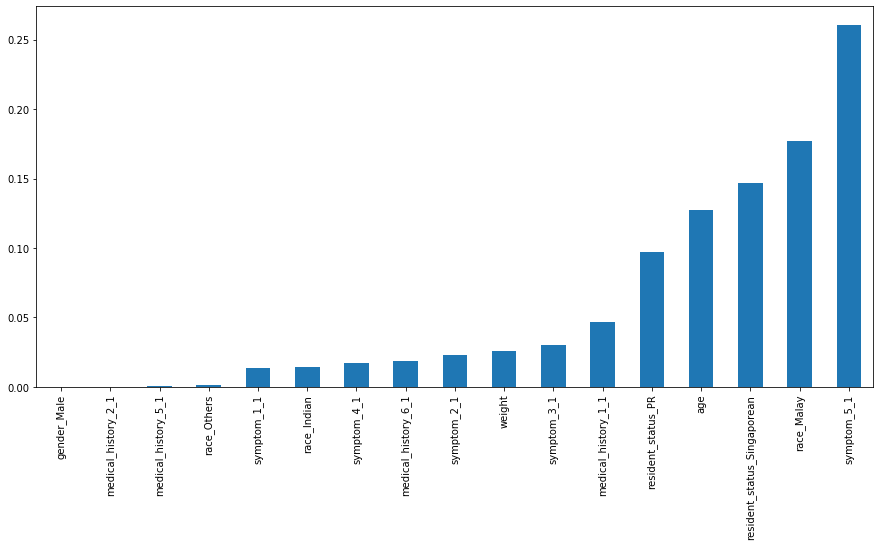

In [159]:
pd.Series(model.feature_importances_, index = features).sort_values(ascending = True).plot.bar(figsize=(15,7))

No handles with labels found to put in legend.


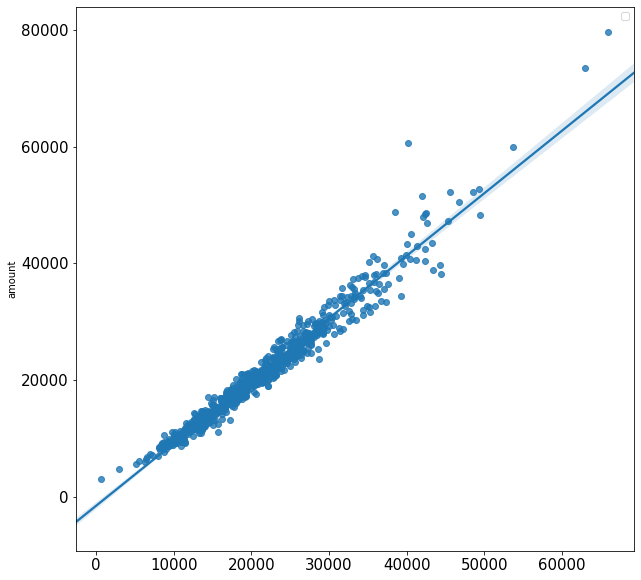

In [160]:
## plotting the fit of the predicted vs the actual amount
plt.figure(figsize = (10,10))
sns.regplot(pred, y_test)
ax.plot()
ax.set_title('Scatterplot of Predicted Cost vs Actual Cost', size = 20)
ax.set_ylabel('Actual Cost', size = 16)
ax.set_xlabel('Predicted Cost', size = 16)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend()

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]), <a list of 9 Text xticklabel objects>)

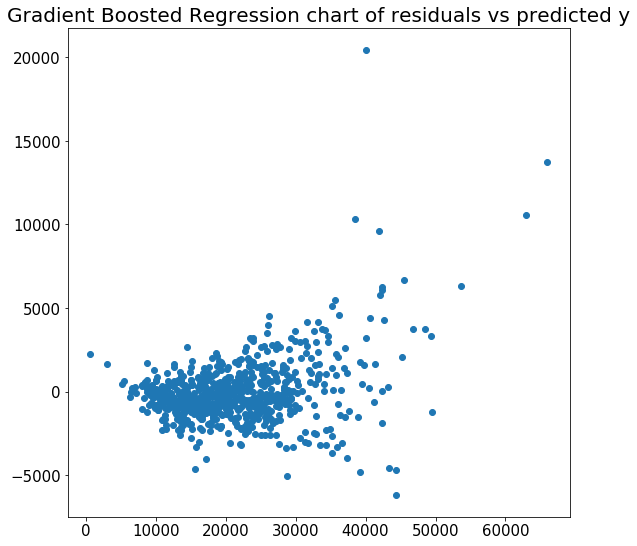

In [161]:
#plotting residuals
plt.figure(figsize = (9,9))
plt.scatter(pred, residual)
plt.title('Gradient Boosted Regression chart of residuals vs predicted y', size = 20)
plt.yticks( size = 15)
plt.xticks(size = 15)